In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from scipy.optimize import linprog

# Ejercicio 1

In [15]:
# Listas de estilos y nadadores
estilos = ["Espalda", "Pecho", "Mariposa", "Libre"]
nadadores = ["Juan", "Jorge", "Samuel", "David", "Tony"]

# Matriz de tiempo dado por estilos y nombre
tiempos = np.array([[37.7, 32.9, 33.8, 37.0, 35.4],[43.3, 33.1, 42.2, 34.7, 41.8],[33.3, 28.5, 38.9, 30.4, 33.6],[29.2, 26.4, 29.6, 28.5, 31.1]])

# Algoritmo de asignación (minimiza el costo total)
filas, columnas = linear_sum_assignment(tiempos)

# Imprimir el estilo con su correspondiente nadador
tiempo_total = 0
print("Asignación óptima:")
for i in range(0, len(columnas)):
    estilo = filas[i]
    nadador = columnas[i]
    tiempo = tiempos[estilo][nadador]
    tiempo_total += tiempo
    print('Estilo:',estilos[estilo], '-> Nombre:', nadadores[nadador])

print(f"\nTiempo total: {tiempo_total:.2f} s")


Asignación óptima:
Estilo: Espalda -> Nombre: Samuel
Estilo: Pecho -> Nombre: David
Estilo: Mariposa -> Nombre: Jorge
Estilo: Libre -> Nombre: Juan

Tiempo total: 126.20 s


# Ejercicio 2

In [16]:
# funcion a minimizar
f = [400, 400, 400, 400, 500, 500, 500, 500, 20, 20, 20]



A_eq = [
    # r1  r2  r3  r4  e1  e2  e3  e4  i1  i2  i3
    [ 1,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0],
    [ 0,  1,  0,  0,  0,  1,  0,  0,  1, -1,  0],
    [ 0,  0,  1,  0,  0,  0,  1,  0,  0,  1, -1],
    [ 0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1],
]

# Demanda
d = [30, 60, 70, 25]

# Restricciones de igualdad
b_eq = d

# Límites de las variables
lim = [
    (0, 40),  # r1
    (0, 40),  # r2
    (0, 40),  # r3
    (0, 40),  # r4
    (0, None),  # e1
    (0, None),  # e2
    (0, None),  # e3
    (0, None),  # e4
    (0, None),  # i1
    (0, None),  # i2
    (0, None),  # i3
]

# Simplex
res = linprog(c=f, A_eq=A_eq, b_eq=b_eq, bounds=lim, method='highs')

# Mostrar resultados

print("Costo mínimo: $", res.fun)
print("Cantidad de carros a producir:")
var = ['r1','r2','r3','r4','e1','e2','e3','e4','i1','i2','i3']
for name, val in zip(var, res.x):
    print(f"{name} = {val:.2f}")


Costo mínimo: $ 78200.0
Cantidad de carros a producir:
r1 = 40.00
r2 = 40.00
r3 = 40.00
r4 = 25.00
e1 = 0.00
e2 = 10.00
e3 = 30.00
e4 = 0.00
i1 = 10.00
i2 = 0.00
i3 = 0.00


# Punto 3

a)

In [17]:
def f(x1, x2):
    return 12*(x1 - 0.5)**2 + 3*(x2 - 1)**2 + x1*(x2 - 0.5)

def grad_f(x1, x2):
    df_dx1 = 24*(x1 - 0.5) + (x2 - 0.5)
    df_dx2 = 6*(x2 - 1) + x1
    return np.array([df_dx1, df_dx2])

In [18]:
def gradient_descent(alpha=0.01, iter=100, t=1e-6, p_i=(0.0, 0.0)):
    p = np.array(p_i, dtype=float)
    h = [p.copy()]

    for i in range(0,iter+1):
      grad = grad_f(p[0], p[1])
      n_p = p - alpha * grad
      h.append(n_p.copy())

      if np.linalg.norm(n_p - p) < t:
        print("Iteraciones: ", i+1)
        break
      if i == iter:
        print("Iteraciones: ", i)
      p = n_p
    print("\nPunto minimo: ", p )
    print("Valor: ", f(p[0], p[1]) )
    return p, f(p[0], p[1]), h

In [19]:
gd = gradient_descent(alpha=0.01, iter=1000, t=1e-6, p_i=(0.0, 0.0))

Iteraciones:  179

Punto minimo:  [0.48251838 0.91956414]
Valor:  0.22552447631499334


In [20]:
gd = gradient_descent(alpha=0.05, iter=1000, t=1e-6, p_i=(0.0, 0.0))

Iteraciones:  37

Punto minimo:  [0.48251763 0.9195777 ]
Valor:  0.2255244755465477


In [21]:
gd = gradient_descent(alpha=0.08, iter=1000, t=1e-6, p_i=(0.0, 0.0))

Iteraciones:  178

Punto minimo:  [0.48251797 0.91958045]
Valor:  0.2255244755273107


In [22]:
gd = gradient_descent(alpha=0.1, iter=1000, t=1e-6, p_i=(0.0, 0.0))

Iteraciones:  1000

Punto minimo:  [5.20421887e+147 2.88236381e+146]
Valor:  3.267560140238565e+296


In [23]:
gd = gradient_descent(alpha=0.01, iter=1000, t=1e-6, p_i=(7.0, 7.0))

Iteraciones:  209

Punto minimo:  [0.48251656 0.91959701]
Valor:  0.2255244763449723


In [24]:
gd = gradient_descent(alpha=0.01, iter=1000, t=1e-6, p_i=(10000.0, -10000.0))

Iteraciones:  332

Punto minimo:  [0.48251839 0.91956412]
Valor:  0.22552447631633107


b) Newton

In [25]:
def hessian():
    return np.array([[24, 1],
                     [1, 6]])

# Método de Newton
def newton_method(iter=1000, tol=1e-6, p_i=(0.0, 0.0)):
    p = np.array(p_i, dtype=float)
    h = [p.copy()]
    H_inv = np.linalg.inv(hessian())

    for i in range(0,iter+1):
      grad = grad_f(p[0], p[1])
      delta = H_inv @ grad
      n_p = p - delta
      h.append(n_p.copy())

      if np.linalg.norm(n_p - p) < tol:
        print("Iteraciones: ", i+1)
        break
      p = n_p

    print("\nPunto mínimo (Newton):", p)
    print("Valor:", f(p[0], p[1]))
    return p, f(p[0], p[1]), h

In [26]:
nm = newton_method(p_i=(0.0, 0.0))

Iteraciones:  2

Punto mínimo (Newton): [0.48251748 0.91958042]
Valor: 0.22552447552447552


In [27]:
nm = newton_method(p_i=(100.0, 0.0))

Iteraciones:  2

Punto mínimo (Newton): [0.48251748 0.91958042]
Valor: 0.22552447552447552


In [28]:
nm = newton_method(p_i=(-50.0, 15.0))

Iteraciones:  2

Punto mínimo (Newton): [0.48251748 0.91958042]
Valor: 0.22552447552447552


Iteraciones:  179

Punto minimo:  [0.48251838 0.91956414]
Valor:  0.22552447631499334
Iteraciones:  2

Punto mínimo (Newton): [0.48251748 0.91958042]
Valor: 0.22552447552447552


(-0.4, 1.2)

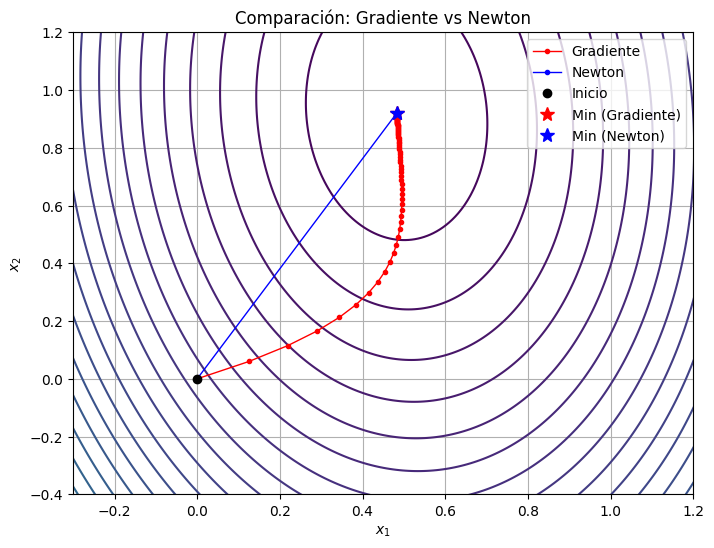

In [29]:
# Crear una malla de puntos
x = np.linspace(-1, 2, 400)
y = np.linspace(-1, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Ejecutar los métodos
p_gd, val_gd, hist_grad = gradient_descent(alpha=0.01, iter=1000, t=1e-6, p_i=(0.0, 0.0))
p_nt, val_nt, hist_newton = newton_method()

# Convertir historial a arrays para graficar
hx_gd = np.array(hist_grad)
hx_nt = np.array(hist_newton)

# Graficar contornos
plt.figure(figsize=(8, 6))
cp = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.title("Comparación: Gradiente vs Newton")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Trayectoria de gradiente
plt.plot(hx_gd[:, 0], hx_gd[:, 1], 'r.-', label='Gradiente', linewidth=1)
# Trayectoria de Newton
plt.plot(hx_nt[:, 0], hx_nt[:, 1], 'b.-', label='Newton', linewidth=1)

# Puntos de inicio y final
plt.plot(hx_gd[0, 0], hx_gd[0, 1], 'ko', label='Inicio')
plt.plot(hx_gd[-1, 0], hx_gd[-1, 1], 'r*', label='Min (Gradiente)', markersize=10)
plt.plot(hx_nt[-1, 0], hx_nt[-1, 1], 'b*', label='Min (Newton)', markersize=10)

plt.legend()
plt.grid(True)
plt.xlim(-0.3, 1.2)
plt.ylim(-0.4, 1.2)
